# Inspect results of ablation study

In [1]:
# Uncomment below line if you are just trying to run this notebook and have not done a full installation of this project
# !pip install pandas==2.2.3 matplotlib==3.9.3 seaborn==0.13.2 tiktoken==0.8.0 numpy==2.0.1

#### Load libraries

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tiktoken

from matplotlib.lines import Line2D

#### Set seaborn plotting settings

In [3]:
sns.set_palette("Greys")
sns.set_context("paper")
sns.set_style("whitegrid")

## Load results dataframe(s)

#### Set up mappings and types for neater presentation and easier sorting of results

In [4]:
path_to_results = "../Data/3-Results/marked_results-compiled.csv"
path_to_ablation_results = "../Data/3-Results/ablation_study/marked_ablation_results-compiled.csv"

mapping_prompt_names = {
    'v0_baseline': "NoContext",
    'v2a_baseline_and_provide_readme': "README",
    'vX2a1_ablation_study_readme_has_the_good_part': "README(Good)",
    'vX2a2_ablation_study_readme_has_the_bad_part': "README(Bad)"
}
# Drop strategies that are not relevant to ablation study
list_names_strategies_drop = [
    "v1_describe_task",
    "v2_describe_task_and_provide_readme",
    "v3_describe_task_and_provide_readme_plus_verified_sample",
    "v3a_describe_task_and_provide_readme_plus_mock_verified_sample",
    "v4_describe_task_and_provide_readme_plus_assets",
    "v5_describe_task_and_provide_readme_plus_mock_verified_sample_plus_assets"
]
# Drop apps that are not part of the ablation study
list_apps_to_drop = [
    "Aidymouse-Hexfriend",
    "MichaelMakesGames-reflector",
    "PrefectHQ-graphs",
    "Zikoat-infinite-minesweeper",
    "aldy-san-zero-neko",
    "coderetreat-coderetreat.org",
    "dimforge-rapier.js",
    "equinor-esv-intersection",
    "getkey-ble",
    "mehanix-arcada",
    "ourcade-ecs-dependency-injection",
    "solaris-games-solaris",
    "tulustul-ants-sandbox",
    "uia4w-uia-wafermap",
]
# Drop the 0th "run", from ~August 16, 2024. Despite specifying the same model snapshot, 
# it is hard to ensure/know we actually used the same model under-the-hood months apart 
# (runs 1,2,3,4 are from the same day, 6th October 2024)
list_numbers_of_runs_drop = [
    0
]
# for sorting
type_prompt_strategy = pd.CategoricalDtype(categories=['NoContext', 'README',  "README(Good)", "README(Bad)"], ordered=True)
type_sample = pd.CategoricalDtype(categories=['clean', 'bug_state', 'bug_rendering', 'bug_layout', 'bug_appearance'], ordered=True)

In [5]:
# for v in df_results_compiled["TextAppName"].unique():
#     print(f"\"{v}\",")

#### Function for using in pd.Series.map(lambda x: ...)

In [6]:
def map_true_false_to_one_zero(input_to_check):
    output_val = None

    if input_to_check == True:
        output_val = 1
        
    elif input_to_check == False:
        output_val = 0

    return output_val

#### Load, slice, and clean DataFrames

In [7]:
def load_dataframe(path_to_csv):
    df = pd.read_csv(path_to_csv, index_col=None)

    for name_of_strategy_to_drop in list_names_strategies_drop:
        df = df[df["TextPromptStrategy"] != name_of_strategy_to_drop].reset_index(drop=True)

    for number_of_run_to_drop in list_numbers_of_runs_drop:
        df = df[df["IntRunNumber"] != number_of_run_to_drop].reset_index(drop=True)

    for app in list_apps_to_drop:
        df = df[df["TextAppName"] != app].reset_index(drop=True)

    df["TextPromptStrategy"] = df["TextPromptStrategy"].map(lambda x: mapping_prompt_names[x])

    df['BoolScreenshotContainsVisualBug'] = df['BoolScreenshotContainsVisualBug'].apply(map_true_false_to_one_zero)
    df['BoolDidDetectVisualBug'] = df['BoolDidDetectVisualBug'].apply(map_true_false_to_one_zero)
    df['BoolDescriptionIsCorrect'] = df['BoolDescriptionIsCorrect'].apply(map_true_false_to_one_zero)

    df['IntRunNumber'] = df['IntRunNumber'].astype(int)
    df['TextPromptStrategy'] = df['TextPromptStrategy'].astype(type_prompt_strategy)
    df['TextAppName'] = df['TextAppName'].astype(str)
    df['TextSampleName'] = df['TextSampleName'].astype(type_sample)
    df['BoolScreenshotContainsVisualBug'] = df['BoolScreenshotContainsVisualBug'].astype(int)
    df['BoolDidDetectVisualBug'] = df['BoolDidDetectVisualBug'].astype(int)
    df['BoolDescriptionIsCorrect'] = df['BoolDescriptionIsCorrect'].astype(int)

    df = df[["TextPromptStrategy", "TextAppName", "TextSampleName", "IntRunNumber", "BoolScreenshotContainsVisualBug", "BoolDidDetectVisualBug", "BoolDescriptionIsCorrect"]]
    df = df.sort_values(by=["TextPromptStrategy", "TextAppName", "TextSampleName", "IntRunNumber"]).reset_index(drop=True)

    return df

In [8]:
df_results_compiled = load_dataframe(path_to_results)
df_ablation_results_compiled = load_dataframe(path_to_ablation_results)

In [9]:
# df_results_compiled

In [10]:
# df_ablation_results_compiled

#### Merge the down-selected (main experiments results) dataframe with the ablation study results dataframe

In [11]:
(df_ablation_results_all := pd.concat([df_results_compiled, df_ablation_results_compiled]))

,TextPromptStrategy,TextAppName,TextSampleName,IntRunNumber,BoolScreenshotContainsVisualBug,BoolDidDetectVisualBug,BoolDescriptionIsCorrect
0,NoContext,VoiceSpaceUnder5-VoiceSpace,clean,1,0,0,1
1,NoContext,VoiceSpaceUnder5-VoiceSpace,clean,2,0,0,1
2,NoContext,VoiceSpaceUnder5-VoiceSpace,clean,3,0,0,1
3,NoContext,VoiceSpaceUnder5-VoiceSpace,clean,4,0,0,1
4,NoContext,VoiceSpaceUnder5-VoiceSpace,bug_state,1,1,0,0
...,...,...,...,...,...,...,...
235,README(Bad),starwards-starwards,bug_layout,4,1,1,0
236,README(Bad),starwards-starwards,bug_appearance,1,1,1,0
237,README(Bad),starwards-starwards,bug_appearance,2,1,1,0
238,README(Bad),starwards-starwards,bug_appearance,3,1,0,0


#### Create lists of unique values from DataFrame

In [12]:
run_numbers = df_ablation_results_all['IntRunNumber'].unique().tolist()
prompt_strategies = df_ablation_results_all['TextPromptStrategy'].unique().tolist()
app_names = df_ablation_results_all['TextAppName'].unique().tolist()
sample_names = df_ablation_results_all['TextSampleName'].unique().tolist()

In [13]:
run_numbers

[1, 2, 3, 4]

In [14]:
prompt_strategies

['NoContext', 'README', 'README(Good)', 'README(Bad)']

In [15]:
app_names

['VoiceSpaceUnder5-VoiceSpace',
 'chase-manning-react-photo-studio',
 'ha-shine-wasm-tetris',
 'higlass-higlass',
 'p5aholic-playground',
 'starwards-starwards']

In [16]:
sample_names

['clean', 'bug_state', 'bug_rendering', 'bug_layout', 'bug_appearance']

## Define functions for use in notebook

#### Metrics function definitions

In [17]:
def get_true_positives(df):
    # (Does contain a bug) AND (did detect bug) AND (description is correct)
    return df.loc[(df["BoolScreenshotContainsVisualBug"] == 1) & (df["BoolDidDetectVisualBug"] == 1) & (df["BoolDescriptionIsCorrect"] == 1)]


def get_false_positives(df):
    # (Does not contain a bug) AND (did detect a bug)
    # OR
    # (Does contain a bug) AND (description is incorrect)
    return df.loc[
        ((df["BoolScreenshotContainsVisualBug"] == 0) & (df["BoolDidDetectVisualBug"] == 1))
        |
        ((df["BoolScreenshotContainsVisualBug"] == 1) & (df["BoolDidDetectVisualBug"] == 1) & (df["BoolDescriptionIsCorrect"] == 0))
    ]


def get_true_negatives(df):
    # (Does not contain a bug) AND (did not detect a bug)
    return df.loc[(df["BoolScreenshotContainsVisualBug"] == 0) & (df["BoolDidDetectVisualBug"] == 0)]


def get_false_negatives(df):
    # (Does contain a bug) AND (did not detect a bug)
    return df.loc[(df["BoolScreenshotContainsVisualBug"] == 1) & (df["BoolDidDetectVisualBug"] == 0)]


In [18]:
def calculate_accuracy(num_true_positives, num_true_negatives, num_false_positives, num_false_negatives):
    try:
        return ((num_true_positives + num_true_negatives) / (num_true_positives + num_true_negatives + num_false_positives + num_false_negatives))
    
    except ZeroDivisionError:
        return 0.0


def calculate_precision(num_true_positives, num_false_positives):
    try:
        return ((num_true_positives) / (num_true_positives + num_false_positives))

    except ZeroDivisionError:
        return 0.0


def calculate_recall(num_true_positives, num_false_negatives):
    try:
        return ((num_true_positives) / (num_true_positives + num_false_negatives))

    except ZeroDivisionError:
        return 0.0

In [19]:
def calc_diff(df_in, name_strategy_to_compare_against, name_strategy_to_compare, name_col_of_metric, is_relative=False):

    idx_compare_against = (df_in["PromptingStrategy"] == name_strategy_to_compare_against).to_numpy()
    idx_compare = (df_in["PromptingStrategy"] == name_strategy_to_compare).to_numpy()

    df_analyse = df_in[idx_compare_against | idx_compare][["AppName", "PromptingStrategy", name_col_of_metric]]
    dict_out = {}

    for app_name in df_analyse["AppName"].unique():
        df_app = df_analyse[df_analyse["AppName"] == app_name]

        group_compare_against = df_app[df_app["PromptingStrategy"] == name_strategy_to_compare_against][name_col_of_metric].values
        group_compare = df_app[df_app["PromptingStrategy"] == name_strategy_to_compare][name_col_of_metric].values

        # if is_relative:
        #     pairwise_diffs = calc_pairwise_relative_diffs(group_compare_against, group_compare)

        # else:
            # pairwise_diffs = calc_pairwise_diffs(group_compare_against, group_compare)
        pairwise_diffs = calc_pairwise_diffs(group_compare_against, group_compare)

        diff_mean = np.mean(pairwise_diffs)
        diff_stddev = np.std(pairwise_diffs)

        dict_out[app_name] = {
            f"diff_{name_col_of_metric.lower()}_mean": diff_mean,
            f"diff_{name_col_of_metric.lower()}_stddev": diff_stddev
        }
    
    df_out = pd.DataFrame(dict_out).T
    return df_out


# def calc_pairwise_relative_diffs(group_compare_against, group_compare):
#     # value returned as a pct out of 100, e.g., 96 means 96%
#     return np.array([
#         100 * ((group_compare[i] - group_compare_against[i]) / group_compare_against[i]) for i in range(len(group_compare_against))
#     ])


def calc_pairwise_diffs(group_compare_against, group_compare):

    list_vals = []

    for i in range(len(group_compare_against)):
        for j in range(len(group_compare)):
            list_vals.append(group_compare[j] - group_compare_against[i])

    return np.array(list_vals)


#### DataFrame function definitions

In [20]:
def slice_data_for_run(df, int_of_run):
    return df.loc[df["IntRunNumber"] == int_of_run]
    
def slice_data_for_prompt(df, name_of_prompt):
    return df.loc[df["TextPromptStrategy"] == name_of_prompt]

def slice_data_for_app(df, name_of_app):
    return df.loc[df["TextAppName"] == name_of_app]

def slice_data_for_sample(df, name_of_sample):
    return df.loc[df["TextSampleName"] == name_of_sample]


In [21]:
def create_empty_dataframe(columns):
    return pd.DataFrame(columns=columns)

#### Plotting function definition

In [22]:
# Font sizes for plots

FONTSIZE_XLARGE = 18
FONTSIZE_LARGE = 16
FONTSIZE_MED = 14

In [23]:
def plot_differences(df_differences, name_of_metric="recall", ax=None, color=None, hatch=None, alpha=1.0):

    if ax is None:
        _, ax = plt.subplots(figsize=(10, 6))

    sns.barplot(
        data=df_differences,
        x=df_differences.index,
        y=f"diff_{name_of_metric.lower()}_mean",
        hue="PromptingStrategy" if color is None else None,
        palette="viridis" if color is None else None,
        ax=ax,
        color=color,
        alpha=alpha,
        hatch=hatch,
        edgecolor=(0.2, 0.2, 0.2),
        linewidth=1,
        errorbar=None,
        yerr=df_differences[f"diff_{name_of_metric.lower()}_stddev"],
        ecolor=(1, 1, 1, 0),
        # errwidth=1,
        # capsize=5
    )

    # Add labels and customization
    ax.axhline(0, color="gray", linestyle="--", linewidth=1)
    ax.set_title("Differences in Recall (Across 4 Repetitions) Compared to Prompting Strategy \"NoContext\"")
    ax.set_ylabel("Difference in recall (%)", fontsize=FONTSIZE_LARGE)
    ax.set_xlabel("Application", fontsize=FONTSIZE_LARGE)
    # ax.legend(title="Prompting Strategy")

    return ax

## Per-app results

### Construct df

In [24]:
# Create empty DataFrame to store metrics
df_metrics_per_app = create_empty_dataframe(['PromptingStrategy', 'AppName', 'Accuracy', 'Precision', 'Recall'])
df_metrics_per_app = df_metrics_per_app.astype({
    'Precision': 'float',
    'Recall': 'float',
    'Accuracy': 'float'
})

for prompt in prompt_strategies:
    df_for_prompt = slice_data_for_prompt(df_ablation_results_all, prompt)

    for app in app_names:
        df_for_prompt_with_sample = slice_data_for_app(df_for_prompt, app)

        # Initialize metrics dictionary
        metrics = {
            'PromptingStrategy': prompt,
            'AppName': app,
            'Accuracy': None,
            'Precision': None,
            'Recall': None,
        }

        list_accuracies = []
        list_precisions = []
        list_recalls = []

        for run in run_numbers:
            df_for_prompt_with_app_on_specific_run = slice_data_for_run(df_for_prompt_with_sample, run)

            num_true_positives = len(get_true_positives(df_for_prompt_with_app_on_specific_run))
            num_true_negatives = len(get_true_negatives(df_for_prompt_with_app_on_specific_run))
            num_false_positives = len(get_false_positives(df_for_prompt_with_app_on_specific_run))
            num_false_negatives = len(get_false_negatives(df_for_prompt_with_app_on_specific_run))

            float_accuracy = np.round(calculate_accuracy(
                num_true_positives,
                num_true_negatives,
                num_false_positives,
                num_false_negatives
            ), 3)
            float_precision = np.round(calculate_precision(num_true_positives, num_false_positives), 3)
            float_recall = np.round(calculate_recall(num_true_positives, num_false_negatives), 3)

            list_accuracies.append(float_accuracy)
            list_precisions.append(float_precision)
            list_recalls.append(float_recall)

        metrics['Accuracy'] = list_accuracies
        metrics['Precision'] = list_precisions
        metrics['Recall'] = list_recalls

        # Ensure consistent data types
        df_metrics_this_sample = pd.DataFrame([metrics])
        # df_metrics_this_sample = df_metrics_this_sample.astype({
        #     # 'Precision': 'list',
        #     # 'Recall': 'list',
        #     # 'Accuracy': 'list',
        # })

        df_metrics_per_app = pd.concat([df_metrics_per_app, df_metrics_this_sample], ignore_index=True)

# Re-order columns
df_metrics_per_app = df_metrics_per_app[[
    "PromptingStrategy",
    "AppName",
    "Accuracy",
    "Precision",
    "Recall",
]]

# Ensure types for ordering
df_metrics_per_app["PromptingStrategy"] = df_metrics_per_app["PromptingStrategy"].astype(type_prompt_strategy)

# Sort DataFrame
df_metrics_per_app.sort_values(["PromptingStrategy", "AppName"])

# Reset index for DataFrame
df_metrics_per_app.reset_index(drop=True, inplace=True)

### View results in tables

In [25]:
df_metrics_per_app

,PromptingStrategy,AppName,Accuracy,Precision,Recall
0,NoContext,VoiceSpaceUnder5-VoiceSpace,"[0.4, 0.4, 0.4, 0.4]","[1.0, 1.0, 1.0, 1.0]","[0.25, 0.25, 0.25, 0.25]"
1,NoContext,chase-manning-react-photo-studio,"[0.4, 0.6, 0.4, 0.2]","[0.5, 1.0, 1.0, 0.0]","[0.333, 0.5, 0.25, 0.0]"
2,NoContext,ha-shine-wasm-tetris,"[0.2, 0.0, 0.4, 0.0]","[0.25, 0.0, 0.333, 0.0]","[0.5, 0.0, 0.5, 0.0]"
3,NoContext,higlass-higlass,"[0.8, 0.6, 0.6, 0.6]","[1.0, 1.0, 0.667, 1.0]","[0.75, 0.5, 0.667, 0.5]"
4,NoContext,p5aholic-playground,"[0.2, 0.4, 0.2, 0.4]","[0.0, 1.0, 0.0, 1.0]","[0.0, 0.25, 0.0, 0.25]"
5,NoContext,starwards-starwards,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
6,README,VoiceSpaceUnder5-VoiceSpace,"[0.6, 0.6, 0.6, 0.6]","[0.667, 1.0, 1.0, 1.0]","[0.667, 0.5, 0.5, 0.5]"
7,README,chase-manning-react-photo-studio,"[0.6, 0.0, 0.8, 0.6]","[1.0, 0.0, 1.0, 1.0]","[0.5, 0.0, 0.75, 0.5]"
8,README,ha-shine-wasm-tetris,"[0.0, 0.4, 0.2, 0.2]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.25, 0.0, 0.0]"
9,README,higlass-higlass,"[0.6, 0.6, 0.4, 0.4]","[1.0, 1.0, 1.0, 0.5]","[0.5, 0.5, 0.25, 0.333]"


#### Look at per-app differences in metrics -- for ablation study

In [26]:
(df_metrics_per_app_exploded := df_metrics_per_app.explode(["Accuracy", "Precision", "Recall"]).reset_index(drop=True))

,PromptingStrategy,AppName,Accuracy,Precision,Recall
0,NoContext,VoiceSpaceUnder5-VoiceSpace,0.4,1.0,0.25
1,NoContext,VoiceSpaceUnder5-VoiceSpace,0.4,1.0,0.25
2,NoContext,VoiceSpaceUnder5-VoiceSpace,0.4,1.0,0.25
3,NoContext,VoiceSpaceUnder5-VoiceSpace,0.4,1.0,0.25
4,NoContext,chase-manning-react-photo-studio,0.4,0.5,0.333
...,...,...,...,...,...
91,README(Bad),p5aholic-playground,0.2,0.0,0.0
92,README(Bad),starwards-starwards,0.2,0.25,0.5
93,README(Bad),starwards-starwards,0.0,0.0,0.0
94,README(Bad),starwards-starwards,0.0,0.0,0.0


In [27]:
# df_metrics_per_app_inspect = df_metrics_per_app_exploded.copy(deep=True).set_index(["AppName"])

In [28]:
# diffs_nocontext_to_readme = calc_diff(df_metrics_per_app_exploded, "NoContext", "README", "Recall", is_relative=False).sort_values(by="diff_recall_mean", ascending=False)

#### Compare to NoContext -- Inspect tables of values

In [29]:
(diffs_nocontext_to_readme := calc_diff(df_metrics_per_app_exploded, "NoContext", "README", "Recall", is_relative=False).sort_values(by="diff_recall_mean", ascending=False))

,diff_recall_mean,diff_recall_stddev
VoiceSpaceUnder5-VoiceSpace,0.29175,0.072313
chase-manning-react-photo-studio,0.16675,0.326742
starwards-starwards,0.12500,0.216506
p5aholic-playground,-0.12500,0.125000
ha-shine-wasm-tetris,-0.18750,0.272431
higlass-higlass,-0.20850,0.153161


In [30]:
(diffs_nocontext_to_readme_good := calc_diff(df_metrics_per_app_exploded, "NoContext", "README(Good)", "Recall", is_relative=False).sort_values(by="diff_recall_mean", ascending=False))

,diff_recall_mean,diff_recall_stddev
starwards-starwards,0.33325,0.408248
VoiceSpaceUnder5-VoiceSpace,0.18750,0.108253
chase-manning-react-photo-studio,0.12500,0.210406
p5aholic-playground,0.06250,0.165359
ha-shine-wasm-tetris,0.00000,0.353553
higlass-higlass,-0.04175,0.233876


In [31]:
(diffs_nocontext_to_readme_bad := calc_diff(df_metrics_per_app_exploded, "NoContext", "README(Bad)", "Recall", is_relative=False).sort_values(by="diff_recall_mean", ascending=False))

,diff_recall_mean,diff_recall_stddev
VoiceSpaceUnder5-VoiceSpace,0.18750,0.108253
starwards-starwards,0.12500,0.216506
chase-manning-react-photo-studio,-0.02075,0.252570
p5aholic-playground,-0.06250,0.165359
higlass-higlass,-0.22925,0.165391
ha-shine-wasm-tetris,-0.25000,0.250000


#### Compare to README (helps to sanity check)

In [32]:
# calc_diff(df_metrics_per_app_exploded, "README", "README(Good)", "Recall", is_relative=False).sort_values(by="mean", ascending=False)

In [33]:
# calc_diff(df_metrics_per_app_exploded, "README", "README(Bad)", "Recall", is_relative=False).sort_values(by="mean", ascending=False)

### Calc number of tokens per file

In [34]:
def read_file_and_count_tokens(path_to_file):
    # read file
    with open(path_to_file, "r") as f:
        content = f.read()

        # count tokens with tiktoken (gpt-4o tokenizer)
        encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
        tokens = encoding.encode(content)

    return len(tokens)

In [35]:
path_to_ablated_readmes = Path("../Data/2-Experiments/ablated_readmes/")

dict_num_tokens = {
    "informative": {},
    "distracting": {}
}

for path_to_file in path_to_ablated_readmes.glob("informative/**/README.md"):
    num_tokens = read_file_and_count_tokens(path_to_file)
    dict_num_tokens["informative"][path_to_file.parent.name] = num_tokens


for path_to_file in path_to_ablated_readmes.glob("distracting/**/README.md"):
    num_tokens = read_file_and_count_tokens(path_to_file)
    dict_num_tokens["distracting"][path_to_file.parent.name] = num_tokens

# dict_num_tokens_rounded = {}

# for key in dict_num_tokens.keys():
#     dict_num_tokens_rounded[key] = {}

#     for app_name in dict_num_tokens[key].keys():
#         dict_num_tokens_rounded[key][app_name] = np.round(dict_num_tokens[key][app_name], -1)

In [36]:
pd.DataFrame(dict_num_tokens)

,informative,distracting
ha-shine-wasm-tetris,11,85
higlass-higlass,134,1888
p5aholic-playground,0,194
VoiceSpaceUnder5-VoiceSpace,115,2323
starwards-starwards,114,1254
chase-manning-react-photo-studio,15,364


### Plot diffs

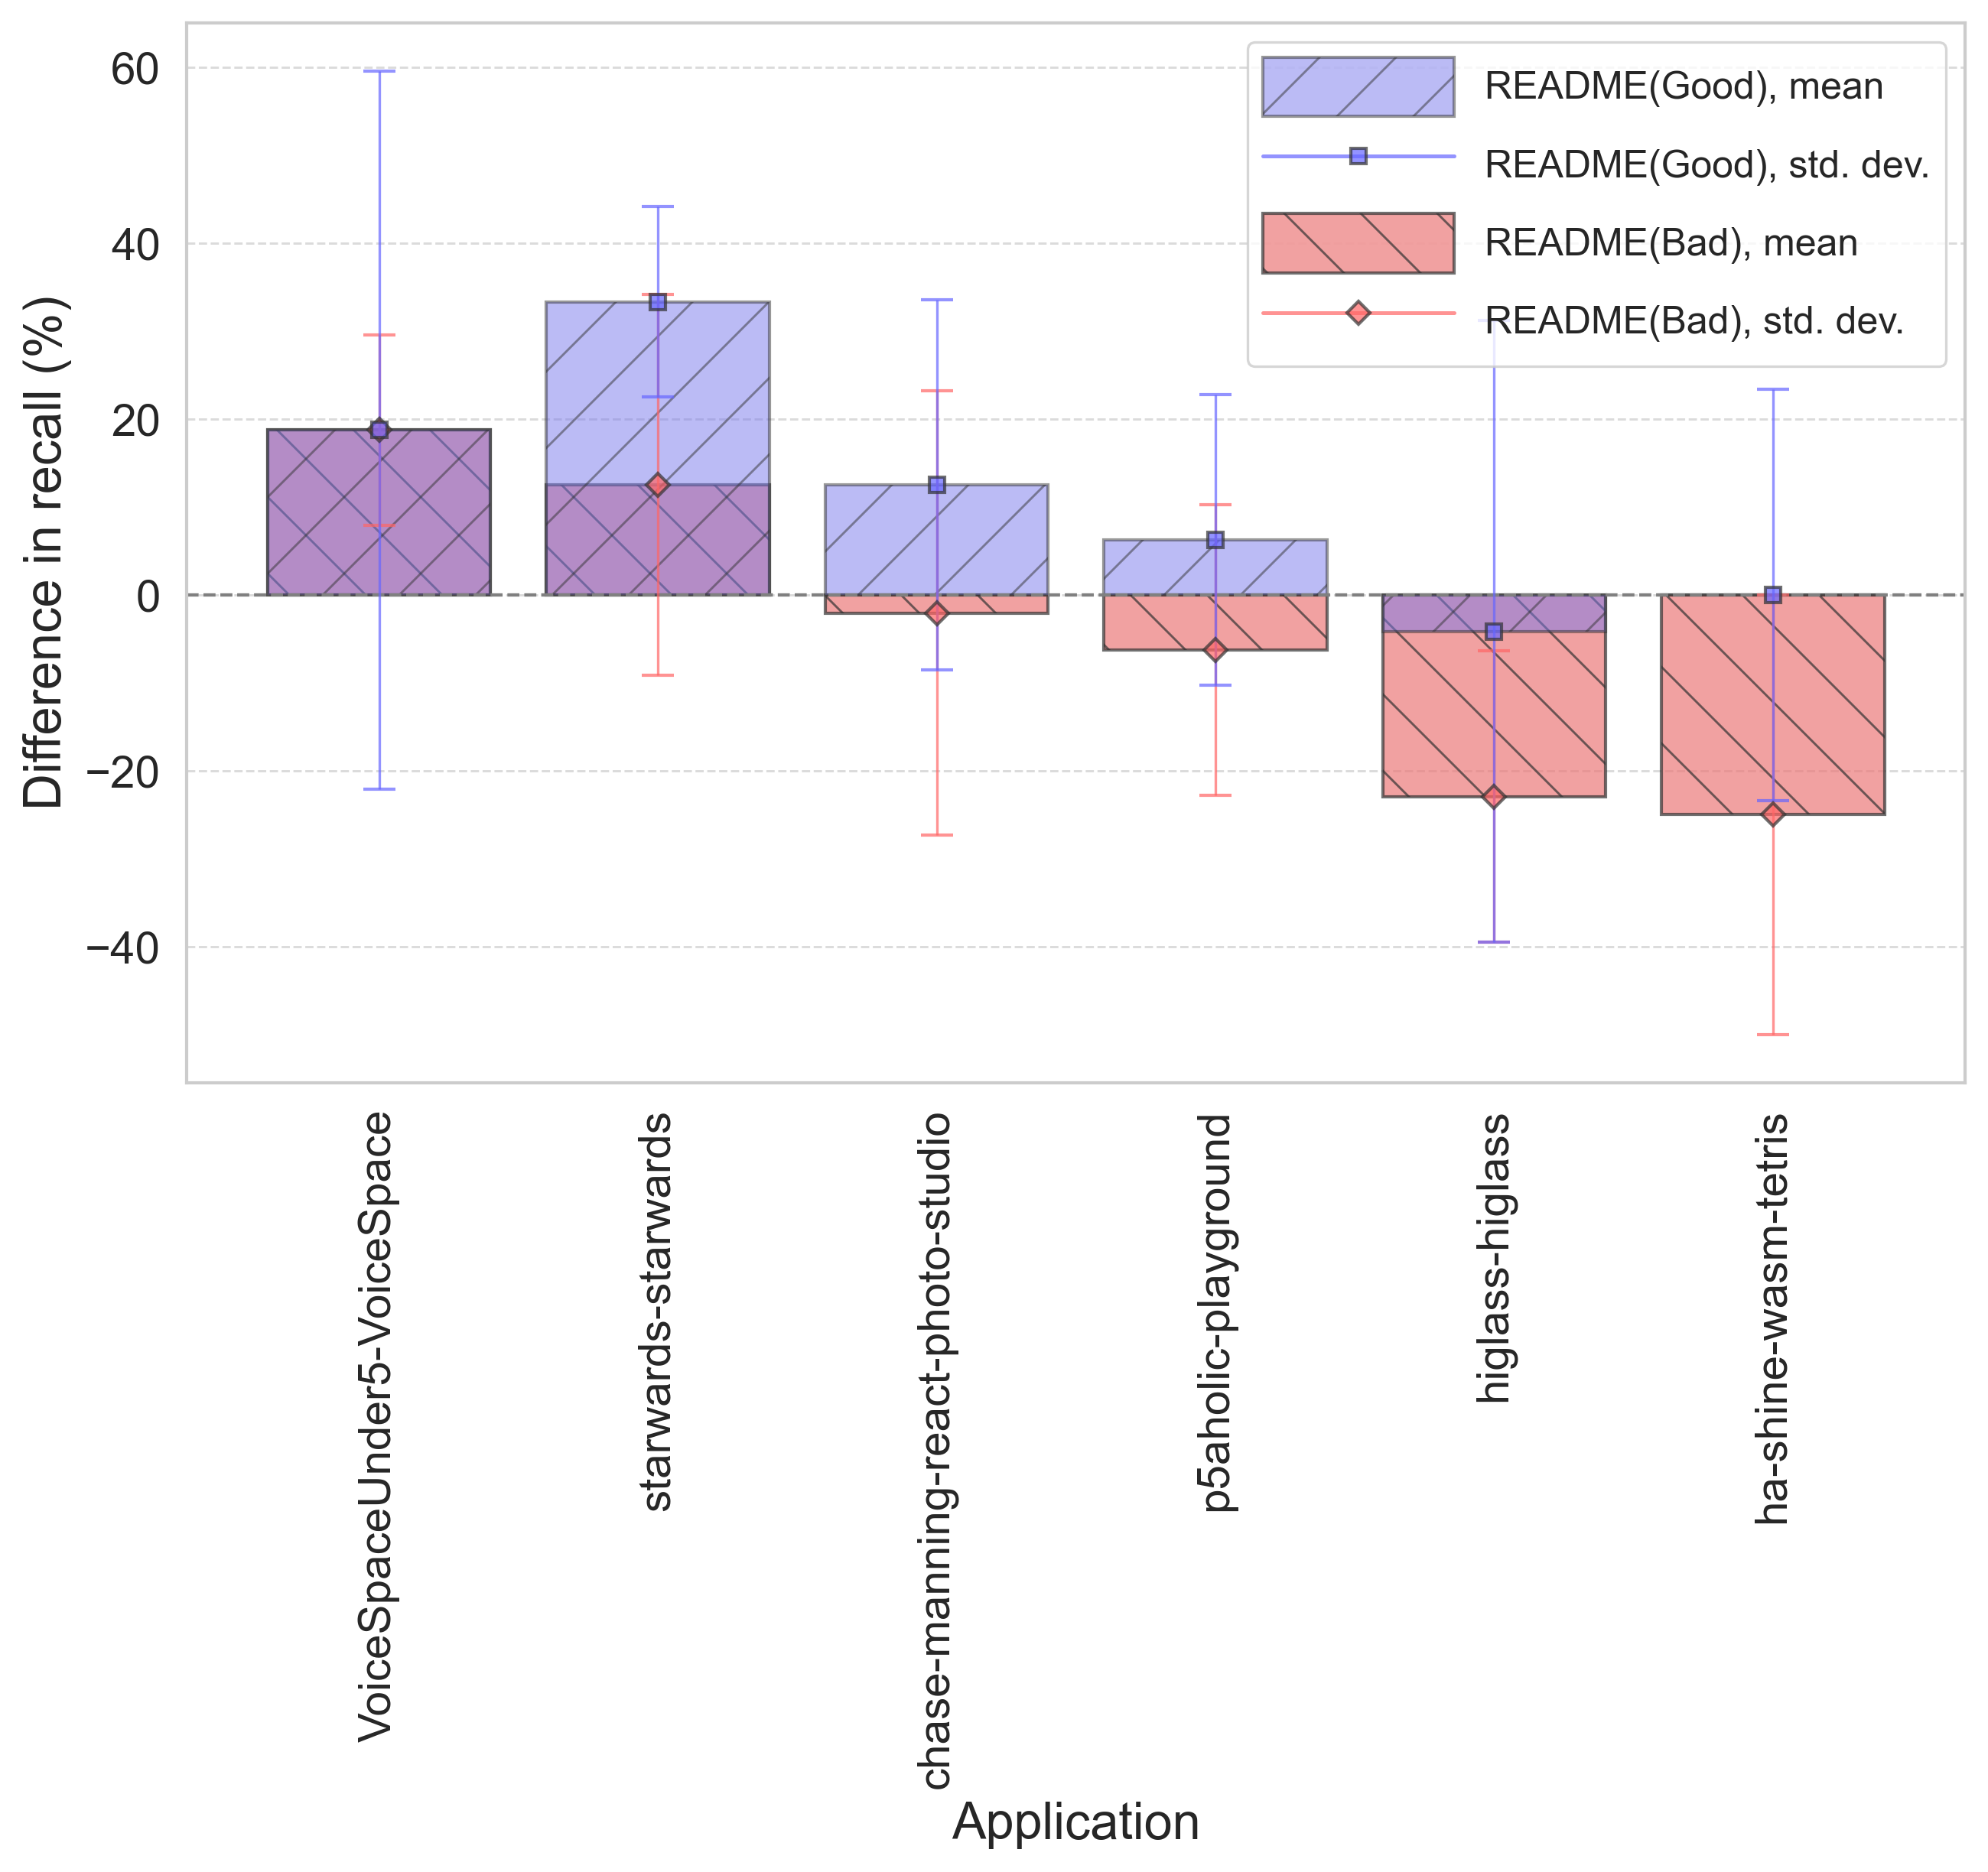

In [37]:
palette = sns.color_palette("colorblind", 4)
hatches = ["/", "\\", "x", "o"]

plt.rcParams['hatch.linewidth'] = 0.7

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

COLOR_GOOD="#6666FF"
COLOR_BAD="#FF6666"

ax = plot_differences(100 * diffs_nocontext_to_readme_bad, color=COLOR_BAD, hatch=hatches[1], ax=ax, alpha=0.7)
ax = plot_differences(100 * diffs_nocontext_to_readme_good, color=COLOR_GOOD, hatch=hatches[0], ax=ax, alpha=0.5)

existing_error_lines = ax.collections[0].get_segments() + ax.collections[1].get_segments()

for i, (bar, error_line) in enumerate(zip(ax.patches, existing_error_lines)):
    # reconstruct the error bars with custom styling
    x = bar.get_width() / 2 + bar.get_x()
    y = bar.get_height()
    y_err = (error_line[1][1] - error_line[0][1]) / 2

    if i < 6:
        color = COLOR_BAD
        marker = "D"
        # ax.text(x, y, dict_num_tokens_rounded["informative"][diffs_nocontext_to_readme_bad.index[i]], ha="center", va="bottom", fontsize=6)
    
    else:
        color = COLOR_GOOD
        marker = "s"
        # ax.text(x, y, dict_num_tokens_rounded["distracting"][diffs_nocontext_to_readme_bad.index[i-6]], ha="center", va="bottom", fontsize=6)

    plt.errorbar(
        x,
        y,
        yerr=y_err,
        markeredgecolor=(0.2, 0.2, 0.2, 0.5),
        markerfacecolor=color,# + (0.7,),
        marker=marker,
        markersize=5,
        ecolor=color,
        capsize=5,
        elinewidth=0.8,
        alpha=0.7
    )

custom_legend_handle_readme_good = Line2D([0], [0], marker="s", color=COLOR_GOOD, markerfacecolor=COLOR_GOOD, markeredgecolor=(0.2, 0.2, 0.2, 0.5), markersize=5, label="README(Good)", alpha=0.7)
custom_legend_handle_readme_bad = Line2D([0], [0], marker="D", color=COLOR_BAD, markerfacecolor=COLOR_BAD, markeredgecolor=(0.2, 0.2, 0.2, 0.5), markersize=5, label="README(Bad)", alpha=0.7)

ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
ax.xaxis.set_tick_params(rotation=90, labelsize=FONTSIZE_MED)
ax.yaxis.set_tick_params(labelsize=FONTSIZE_MED)

ax.legend(
    handles=[ax.patches[6], custom_legend_handle_readme_good, ax.patches[0], custom_legend_handle_readme_bad],
    labels=["README(Good), mean", "README(Good), std. dev.", "README(Bad), mean", "README(Bad), std. dev."],
    # title="Prompting Strategy and Metric",
    handleheight=2.0,
    handlelength=5.0,
    fontsize=12,
    loc="upper right",
    # bbox_to_anchor=(1.6, 0.675),
    # borderaxespad=0.
)

plt.title("")
# plt.tight_layout()
plt.savefig("results_ablation-recall_diffs.pdf", dpi=300, bbox_inches="tight")

----